## Study session 10 - data analysis
### BIOINF 575 - Fall 2020
SOLUTION

____

### <font color = "red">Exercise</font>

[ClinVar][1] is a freely accessible, public archive of reports of the relationships among human variations and phenotypes, with supporting evidence.


The data you will be working with (`clinvar.vcf`).  More information about the database can be found [here][3].

From: https://ftp.ncbi.nlm.nih.gov/pub/clinvar/vcf_GRCh38/

Download the file clinvar.vcf.gz


### The file format
The beginning of every VCF file contains various sets of information:
* Meta-information (details about the experiment or configuration) lines start with **`##`**
    * These lines are helpful in understanding specialized keys found in the `INFO` column. It is in these sections that one can find:
        * The description of the key
        * The data type of the values
        * The default value of the values
* Header lines (column names) start with **`#`**

From there on, each line is made up of tab (`\t`) separated values that make up eight (8) columns. Those columns are:
1. CHROM (chromosome)
2. POS (base pair position of the variant)
3. ID (identifier if applicable; `.` if not applicable/missing)
4. REF (reference base)
5. ALT (alternate base(s): comma (`,`) separated if applicable)
6. QUAL (Phred-scaled quality score; `.` if not applicable/missing)
7. FILTER (filter status; `.` if not applicable/missing)
8. INFO (any additional information about the variant)
    * Semi-colon (`;`) separated key-value pairs
    * Key-value pairs are equal sign (`=`) separated (key on the left, value on the right)
    * If a key has multiple values, the values are pipe (`|`) separated

---
[1]: https://www.ncbi.nlm.nih.gov/clinvar/intro/
[2]: https://samtools.github.io/hts-specs/VCFv4.3.pdf
[3]: http://exac.broadinstitute.org


We also have a file with the gene expression for 45h every three hours for breast cancer cells treated with a HER2 inhibitor, `GSE22955_small_gene_table.txt`.
This is in the class_notebooks folder.
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE22955

### - Load the data from the 2 files in pandas dataframes

In [1]:
import numpy as np
import pandas as pd

In [2]:
variant_file_name = "clinvar.vcf"
expression_file_path = "../class_notebooks/GSE22955_small_gene_table.txt"

In [3]:
variant_data = pd.read_csv(variant_file_name, comment = "#", sep = "\t", header = None)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
variant_data.columns = ("CHROM","POS","ID","REF","ALT","QUAL","FILTER","INFO")
variant_data

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO
0,1,930188,846933,G,A,.,.,ALLELEID=824438;CLNDISDB=MedGen:CN517202;CLNDN...
1,1,930203,972363,C,T,.,.,ALLELEID=959431;CLNDISDB=MedGen:CN517202;CLNDN...
2,1,930248,789256,G,A,.,.,AF_ESP=0.00347;AF_EXAC=0.00622;AF_TGP=0.00280;...
3,1,930275,969662,T,G,.,.,ALLELEID=959432;CLNDISDB=MedGen:CN517202;CLNDN...
4,1,930336,843786,G,A,.,.,ALLELEID=824439;CLNDISDB=MedGen:CN517202;CLNDN...
...,...,...,...,...,...,...,...,...
778083,MT,16013,690274,A,G,.,.,"ALLELEID=677666;CLNDISDB=MONDO:MONDO:0010789,M..."
778084,MT,16015,690276,T,TATTCTCTGTTCTTTC,.,.,"ALLELEID=677667;CLNDISDB=MONDO:MONDO:0010789,M..."
778085,MT,16017,690275,T,C,.,.,"ALLELEID=677668;CLNDISDB=MONDO:MONDO:0010789,M..."
778086,MT,16021,690277,C,T,.,.,"ALLELEID=677669;CLNDISDB=MONDO:MONDO:0010789,M..."


In [5]:
expression_data = pd.read_csv(expression_file_path, comment = "#", sep = "\t", index_col = 0)

In [6]:
expression_data

,0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45
Symbol,,,,,,,,,,,,,,,,
ABCA1,7.497117,8.184737,8.384009,8.654385,8.705771,9.266485,9.097249,8.980061,8.911098,9.377178,9.142381,9.314741,9.622010,9.543455,9.559486,10.094392
ABCC11,9.681143,9.687135,9.498255,9.357438,9.189169,9.049327,8.976153,8.978854,8.967797,8.912375,8.851690,8.787110,8.679719,8.771382,8.633315,8.703377
ABCC3,12.834826,12.841947,12.924113,12.810950,12.990568,12.791429,12.410250,12.343846,11.682339,11.369507,11.188391,11.105528,11.343285,11.151681,11.214401,10.928790
ABLIM1,10.786000,10.912505,11.060394,11.091041,11.166662,11.293522,11.355008,11.331177,11.649917,11.622126,11.733842,11.772563,11.909730,11.724674,11.835192,11.720621
ABP1,7.943247,8.121638,8.293621,8.314716,8.345499,8.414776,8.368459,8.539609,8.649921,8.698824,8.688555,8.762338,9.098345,9.294049,9.323449,9.729671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF606,8.528510,8.394945,8.560340,8.955600,8.972039,8.858380,8.986870,9.040801,9.199987,9.201530,9.096592,9.201962,9.113082,9.238377,8.999179,9.076324
ZNF616,9.533892,9.671308,9.998892,10.189743,10.348529,10.293577,10.457835,10.426120,10.290234,10.279000,10.247908,10.289320,10.175219,10.316580,10.406839,10.225305
ZNF83,9.363751,9.162289,9.199572,9.589662,10.164692,10.039752,10.300014,10.099996,10.102037,9.971016,9.992117,10.033500,10.252678,10.170821,10.269105,9.959197


______

#### - Select only 5 genes of interest from the expression data frame TP53, BARD1, BRCA1, MAPK1, CHEK2

In [7]:
important_genes = ("TP53", "BARD1", "BRCA1", "MAPK1", "CHEK2")

In [8]:
goi_data = expression_data.loc[important_genes,:]

In [9]:
goi_data

,0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45
Symbol,,,,,,,,,,,,,,,,
TP53,9.200789,9.216372,9.050205,8.810025,9.228241,9.129489,9.071350,8.876624,8.701105,8.716909,8.430416,8.595401,8.520036,8.257401,8.218460,7.982049
BARD1,10.221535,10.701018,10.413019,10.139816,9.597768,9.822128,9.577566,9.318428,9.632759,9.462205,9.476985,9.339228,9.134728,9.157332,9.273025,9.558056
BRCA1,9.940983,10.037104,10.061594,9.833829,9.139316,8.980142,8.951006,8.806894,9.003011,8.885428,8.816547,8.724686,8.402657,8.386593,8.396024,8.605764
MAPK1,10.219226,10.129187,10.040317,9.765913,9.617056,9.417145,9.727285,9.632413,9.604481,9.375869,9.533505,9.526265,9.521666,9.490718,9.360262,9.597784
CHEK2,10.281308,10.158531,10.153390,10.126042,10.300719,10.281632,10.089970,10.184045,9.777084,9.990490,9.657020,9.736517,9.368978,9.328541,9.175359,9.412664


#### - Plot the expression of these genes 

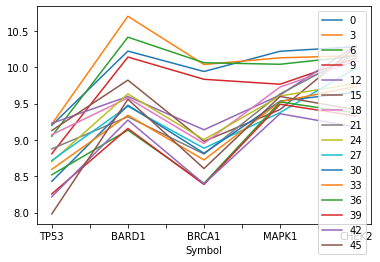

In [10]:
goi_data.plot()

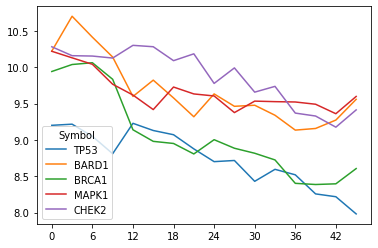

In [11]:
goi_data.T.plot()

______

#### - Select only genes that have a standard dev > 0.7 and a change between hour 0 and hour 45 > 1.4 fold.


In [12]:
gene_sd = expression_data.std(axis = 1)
gene_sd

Symbol
ABCA1     0.634829
ABCC11    0.343696
ABCC3     0.803495
ABLIM1    0.355669
ABP1      0.483524
            ...   
ZNF606    0.257139
ZNF616    0.257465
ZNF83     0.375355
ZNFX1     0.369599
ZWINT     0.653463
Length: 1175, dtype: float64

In [13]:
gene_sd > 0.7

Symbol
ABCA1     False
ABCC11    False
ABCC3      True
ABLIM1    False
ABP1      False
          ...  
ZNF606    False
ZNF616    False
ZNF83     False
ZNFX1     False
ZWINT     False
Length: 1175, dtype: bool

In [14]:
sum(gene_sd > 0.7)

153

In [15]:
cond_sd = gene_sd > 0.7

In [16]:
gene_sd.name = "geneSD"
expression_data_sd = expression_data.join(gene_sd)

In [17]:
expression_data_sd[cond_sd]

,0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,geneSD
Symbol,,,,,,,,,,,,,,,,,
ABCC3,12.834826,12.841947,12.924113,12.810950,12.990568,12.791429,12.410250,12.343846,11.682339,11.369507,11.188391,11.105528,11.343285,11.151681,11.214401,10.928790,0.803495
ACOT7,13.598253,13.604827,13.339805,12.807434,11.948440,11.811037,11.645368,11.716214,11.874139,11.742073,11.701809,11.554689,11.121364,11.210689,11.159153,11.074193,0.862160
ADCY3,11.822269,11.896229,11.618496,11.523163,10.551872,10.311498,10.172793,10.154033,10.078320,10.211324,10.059485,10.187901,9.920810,9.953198,10.113943,10.073615,0.718903
ADH1A,8.361994,8.827013,9.378511,10.566180,10.256555,10.407172,10.765887,11.121747,11.493566,11.771011,11.687379,12.114453,12.009896,12.204300,12.262426,12.550255,1.277729
ADH1C,8.209849,8.367908,9.104123,10.062300,9.829055,10.213800,10.530419,10.707635,11.252292,11.370705,11.445012,11.786950,11.793588,11.939639,11.775485,11.926255,1.250391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UBE2T,12.897987,12.886492,12.985890,12.661279,11.569319,11.295491,11.141461,11.078540,11.505352,11.392094,11.202036,10.990693,10.364399,10.223607,10.280340,10.400024,0.955092
UPP1,13.702239,13.418431,13.062120,12.449544,13.652051,13.055893,12.213460,12.063176,11.507472,11.310697,11.456367,11.164330,11.232900,11.227284,11.194986,11.639511,0.947394
VSIG2,8.535235,8.712725,8.715803,9.023070,8.713907,8.838477,9.063217,9.251125,9.803730,9.780466,10.132970,10.112527,10.678296,10.818278,11.022012,10.913056,0.887242


In [18]:
expression_data[cond_sd]

,0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45
Symbol,,,,,,,,,,,,,,,,
ABCC3,12.834826,12.841947,12.924113,12.810950,12.990568,12.791429,12.410250,12.343846,11.682339,11.369507,11.188391,11.105528,11.343285,11.151681,11.214401,10.928790
ACOT7,13.598253,13.604827,13.339805,12.807434,11.948440,11.811037,11.645368,11.716214,11.874139,11.742073,11.701809,11.554689,11.121364,11.210689,11.159153,11.074193
ADCY3,11.822269,11.896229,11.618496,11.523163,10.551872,10.311498,10.172793,10.154033,10.078320,10.211324,10.059485,10.187901,9.920810,9.953198,10.113943,10.073615
ADH1A,8.361994,8.827013,9.378511,10.566180,10.256555,10.407172,10.765887,11.121747,11.493566,11.771011,11.687379,12.114453,12.009896,12.204300,12.262426,12.550255
ADH1C,8.209849,8.367908,9.104123,10.062300,9.829055,10.213800,10.530419,10.707635,11.252292,11.370705,11.445012,11.786950,11.793588,11.939639,11.775485,11.926255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UBE2T,12.897987,12.886492,12.985890,12.661279,11.569319,11.295491,11.141461,11.078540,11.505352,11.392094,11.202036,10.990693,10.364399,10.223607,10.280340,10.400024
UPP1,13.702239,13.418431,13.062120,12.449544,13.652051,13.055893,12.213460,12.063176,11.507472,11.310697,11.456367,11.164330,11.232900,11.227284,11.194986,11.639511
VSIG2,8.535235,8.712725,8.715803,9.023070,8.713907,8.838477,9.063217,9.251125,9.803730,9.780466,10.132970,10.112527,10.678296,10.818278,11.022012,10.913056


In [19]:

# log2(1/2) == -1 log2(2) == 1
gene_fold_change = expression_data.loc[:,"45"]/expression_data.loc[:,"0"]
cond_fold_change = abs(np.log2(gene_fold_change)) > np.log2(1.4)

In [20]:
cond_fold_change

Symbol
ABCA1     False
ABCC11    False
ABCC3     False
ABLIM1    False
ABP1      False
          ...  
ZNF606    False
ZNF616    False
ZNF83     False
ZNFX1     False
ZWINT     False
Length: 1175, dtype: bool

In [21]:
sum(cond_fold_change)

5

In [22]:
# expression_data_sd.drop(columns = "geneFC", inplace = True)


In [23]:

gene_fold_change.name = "geneFC"
expression_data_sd = expression_data_sd.join(gene_fold_change)
expression_data_sd[cond_sd & cond_fold_change]

,0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,geneSD,geneFC
Symbol,,,,,,,,,,,,,,,,,,
ADH1A,8.361994,8.827013,9.378511,10.566180,10.256555,10.407172,10.765887,11.121747,11.493566,11.771011,11.687379,12.114453,12.009896,12.204300,12.262426,12.550255,1.277729,1.500869
ADH1C,8.209849,8.367908,9.104123,10.062300,9.829055,10.213800,10.530419,10.707635,11.252292,11.370705,11.445012,11.786950,11.793588,11.939639,11.775485,11.926255,1.250391,1.452677
CCL2,12.619085,10.091347,9.562717,8.840072,9.008635,8.701372,8.561566,8.548134,8.454427,8.483174,8.257832,8.184132,8.188751,8.304568,8.349592,7.823147,1.142870,0.619946
CYP1A1,8.852036,10.607981,10.871058,11.003644,11.880618,11.771992,12.114453,12.089954,11.968187,11.716474,12.266210,12.208526,12.635865,12.350391,12.503475,12.692957,0.980201,1.433903
IL8,13.985411,11.492268,11.320368,10.591507,11.323523,10.572259,10.376082,10.481849,10.061828,10.021562,10.040720,10.002081,9.865461,9.820557,9.671547,9.690952,1.079800,0.692933


In [24]:
1/0.619946

1.6130437167108103

#### - Plot the expression of these genes

In [25]:
selected_genes = expression_data[cond_sd & cond_fold_change]

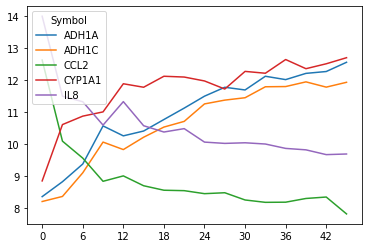

In [26]:
selected_genes.T.plot()

#### - From the VCF file identify the genes for each variant from the info column GENEINFO key


In [27]:
def get_genes(info):
    genes = set()
    info_dict = {}
    for info_elem in info.split(";"):
        key, value = info_elem.split("=")
        info_dict[key] = value
    #print(info_dict)
    if "GENEINFO" in info_dict:
        for gene_pair in info_dict["GENEINFO"].split("|"):
            gene_symbol, gene_id = gene_pair.split(":")
            genes.add(gene_symbol)
    return genes
        
    

In [28]:
info_data = "ALLELEID=824438;CLNDISDB=MedGen:CN517202;CLNDN=not_provided;CLNHGVS=NC_000001.11:g.930188G>A;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Uncertain_significance;CLNVC=single_nucleotide_variant;CLNVCSO=SO:0001483;GENEINFO=SAMD11:148398|test_gene:1234;MC=SO:0001583|missense_variant;ORIGIN=1"

In [29]:
info_data

'ALLELEID=824438;CLNDISDB=MedGen:CN517202;CLNDN=not_provided;CLNHGVS=NC_000001.11:g.930188G>A;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Uncertain_significance;CLNVC=single_nucleotide_variant;CLNVCSO=SO:0001483;GENEINFO=SAMD11:148398|test_gene:1234;MC=SO:0001583|missense_variant;ORIGIN=1'

In [30]:
get_genes(info_data)

{'SAMD11', 'test_gene'}

In [31]:
gene_data = variant_data.INFO.apply(get_genes)

In [32]:
gene_data

0         {SAMD11}
1         {SAMD11}
2         {SAMD11}
3         {SAMD11}
4         {SAMD11}
            ...   
778083     {MT-TP}
778084     {MT-TP}
778085     {MT-TP}
778086     {MT-TP}
778087       {ABO}
Name: INFO, Length: 778088, dtype: object

#### - Select only the variants for our genes of interest:

In [33]:
important_genes = ("TP53", "BARD1", "BRCA1", "MAPK1", "CHEK2")

In [34]:
cond_genes = gene_data.apply(lambda gene_set: len(gene_set.intersection(set(important_genes))) > 0)

In [35]:
sum(cond_genes)

16874

In [36]:
gene_data.name = "GenesSet"
variant_data_genes = variant_data.join(gene_data)

In [37]:
variant_data_genes.drop(columns = "INFO", inplace = True)

In [38]:
variant_data_genes[cond_genes]

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,GenesSet
129497,2,214727991,951555,ATGTACAGAATAAAAATATGTACCATGAGCCTAGTGTTGATTTTTA...,A,.,.,{BARD1}
129498,2,214728537,801873,C,CTT,.,.,{BARD1}
129499,2,214728537,801874,C,CTTT,.,.,{BARD1}
129500,2,214728537,369328,C,CTTTT,.,.,{BARD1}
129501,2,214728537,801875,CT,C,.,.,{BARD1}
...,...,...,...,...,...,...,...,...
734163,22,28741802,381607,C,G,.,.,{CHEK2}
734164,22,28741806,341057,C,G,.,.,{CHEK2}
734165,22,28741832,803661,T,A,.,.,{CHEK2}
734166,22,28741876,126906,T,C,.,.,{CHEK2}


In [39]:
variant_data_genes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778088 entries, 0 to 778087
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   CHROM     778088 non-null  object
 1   POS       778088 non-null  int64 
 2   ID        778088 non-null  int64 
 3   REF       778088 non-null  object
 4   ALT       778088 non-null  object
 5   QUAL      778088 non-null  object
 6   FILTER    778088 non-null  object
 7   GenesSet  778088 non-null  object
dtypes: int64(2), object(6)
memory usage: 47.5+ MB


In [40]:
variant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778088 entries, 0 to 778087
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   CHROM   778088 non-null  object
 1   POS     778088 non-null  int64 
 2   ID      778088 non-null  int64 
 3   REF     778088 non-null  object
 4   ALT     778088 non-null  object
 5   QUAL    778088 non-null  object
 6   FILTER  778088 non-null  object
 7   INFO    778088 non-null  object
dtypes: int64(2), object(6)
memory usage: 47.5+ MB
